In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e7/sample_submission.csv
/kaggle/input/playground-series-s4e7/train.csv
/kaggle/input/playground-series-s4e7/test.csv


In [5]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [6]:
df_train = pd.read_csv(r"/kaggle/input/playground-series-s4e7/train.csv")
df_test = pd.read_csv(r'/kaggle/input/playground-series-s4e7/test.csv')

In [4]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [5]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,11504798.00,11504798.00,11504798.00,11504798.00,11504798.00,11504798.00,11504798.00,11504798.00,11504798.00
mean,5752398.50,38.38,1.00,26.42,0.46,30461.37,112.43,163.90,0.12
std,3321149.26,14.99,0.04,12.99,0.50,16454.75,54.04,79.98,0.33
min,0.00,20.00,0.00,0.00,0.00,2630.00,1.00,10.00,0.00
25%,2876199.25,24.00,1.00,15.00,0.00,25277.00,29.00,99.00,0.00
50%,5752398.50,36.00,1.00,28.00,0.00,31824.00,151.00,166.00,0.00
75%,8628597.75,49.00,1.00,35.00,1.00,39451.00,152.00,232.00,0.00
max,11504797.00,85.00,1.00,52.00,1.00,540165.00,163.00,299.00,1.00


In [6]:
df_train.shape

(11504798, 12)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7669866 entries, 0 to 7669865
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 643.7+ MB


In [12]:
Gender_mapping = {'Male':1,'Female':0}
Vehicle_Age_mapping = {'< 1 Year':0, '1-2 Year':1, '> 2 Years':2}
Vehicle_Damage_mapping = {'Yes':1, 'No':0}


df_train['Gender'] = df_train['Gender'].map(Gender_mapping)
df_train['Vehicle_Age'] = df_train['Vehicle_Age'].map(Vehicle_Age_mapping)
df_train['Vehicle_Damage'] = df_train['Vehicle_Damage'].map(Vehicle_Damage_mapping)

df_test['Gender'] = df_test['Gender'].map(Gender_mapping)
df_test['Vehicle_Age'] = df_test['Vehicle_Age'].map(Vehicle_Age_mapping)
df_test['Vehicle_Damage'] = df_test['Vehicle_Damage'].map(Vehicle_Damage_mapping)

In [ ]:
df_train.head(100)

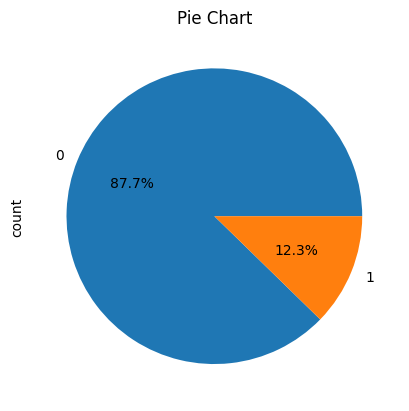

In [11]:
df_train["Response"].value_counts().plot.pie(autopct='%1.1f%%', title="Pie Chart")
plt.show()


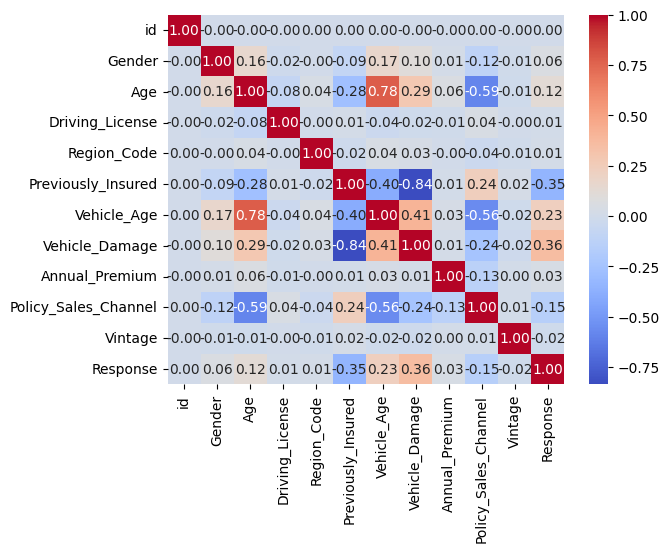

In [12]:
correlation_matrix = df_train.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()



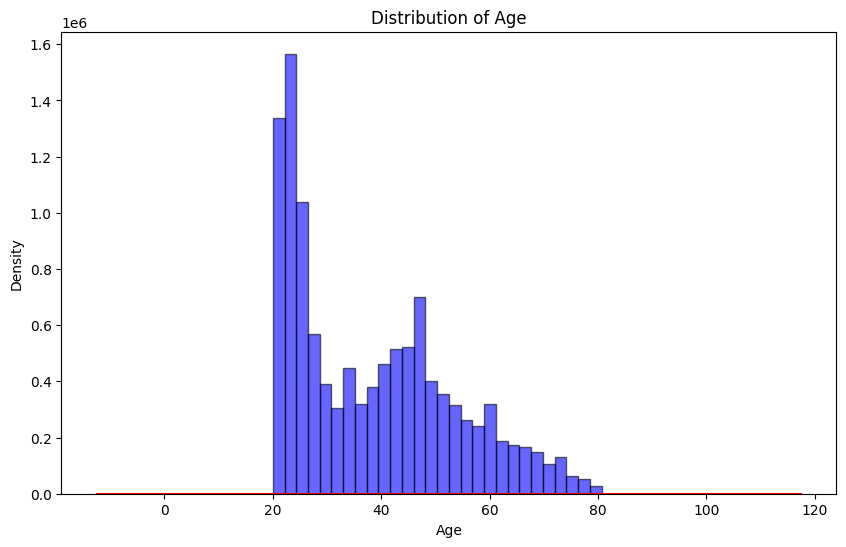

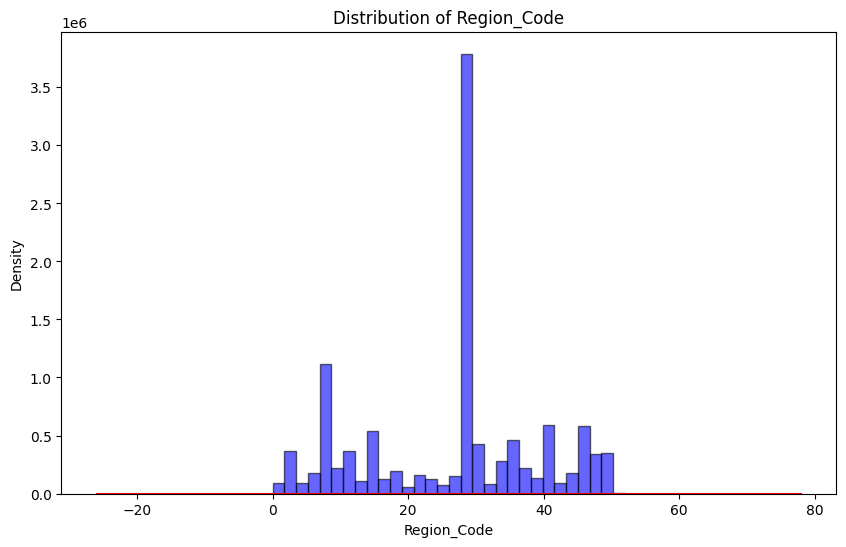

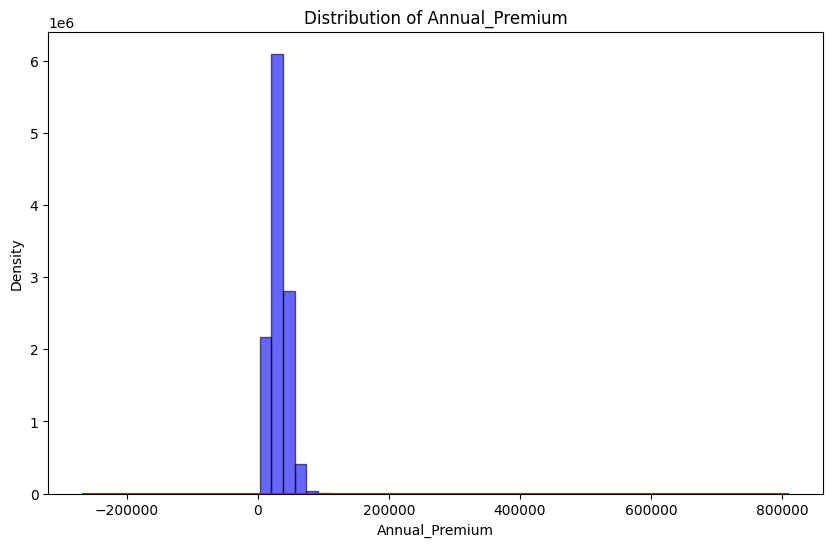

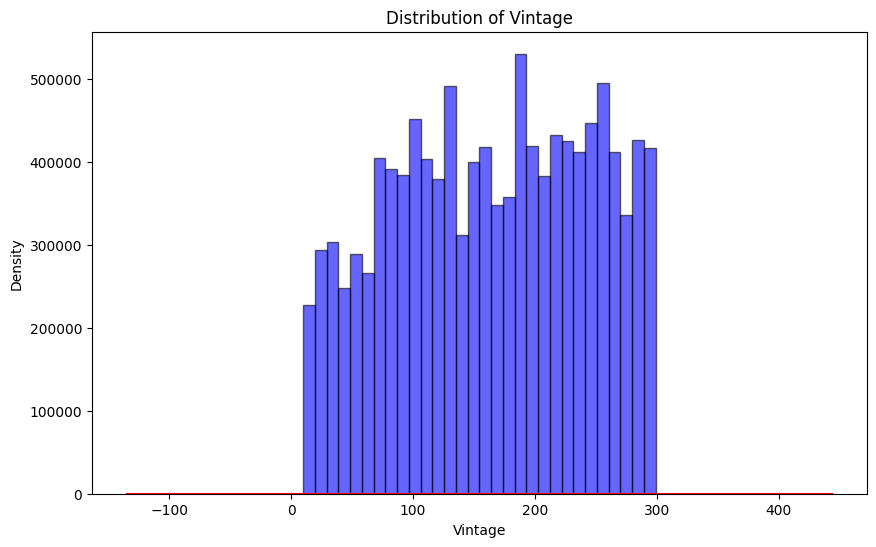

In [13]:
numerical_features = ['Age', 'Region_Code', 'Annual_Premium', 'Vintage']

#
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    
    
    df_train[feature].plot(kind='hist', bins=30, alpha=0.6, color='blue', edgecolor='black')
    
    # （KDE）
    df_train[feature].plot(kind='density', color='red')
    
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

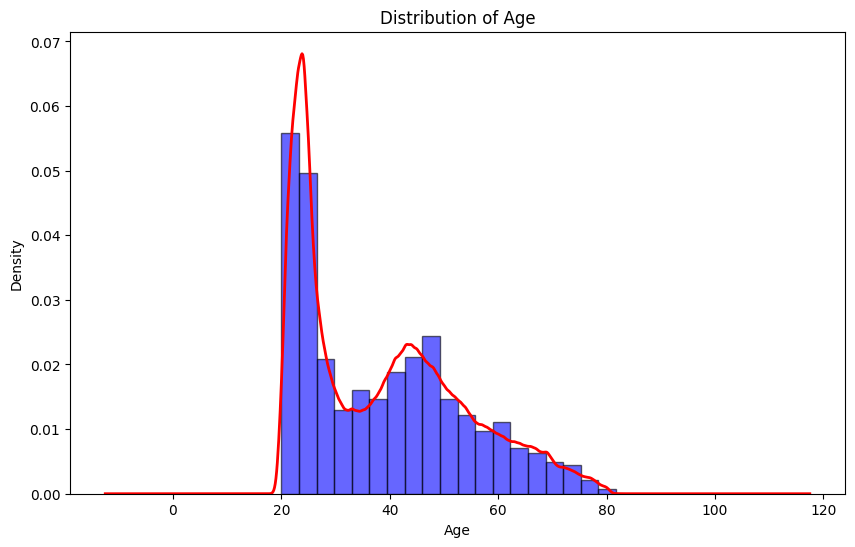

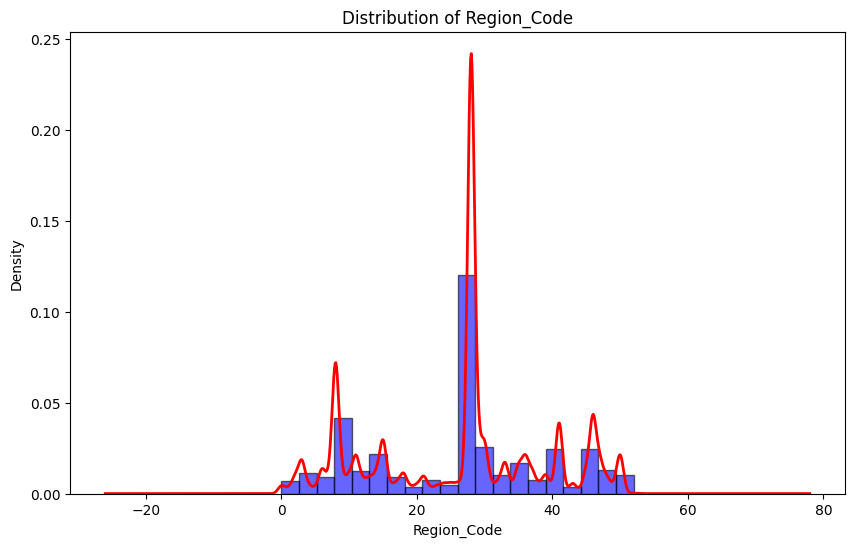

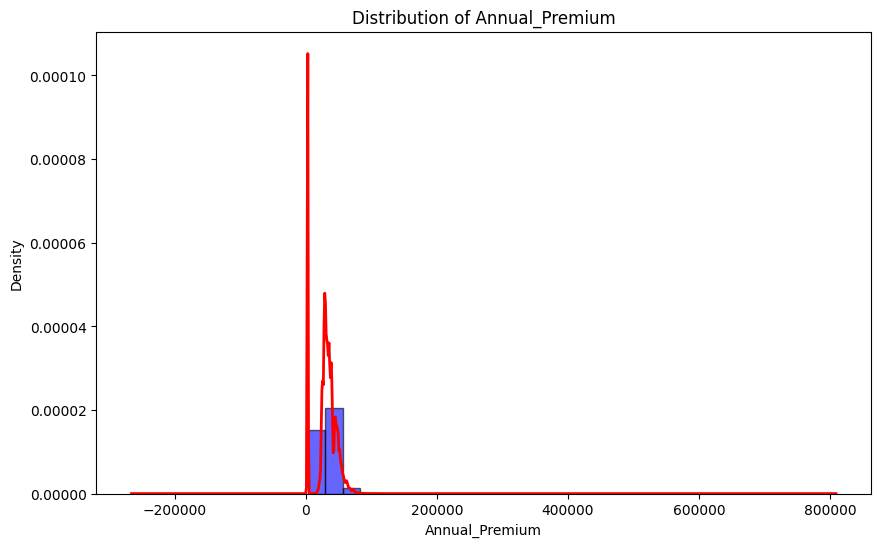

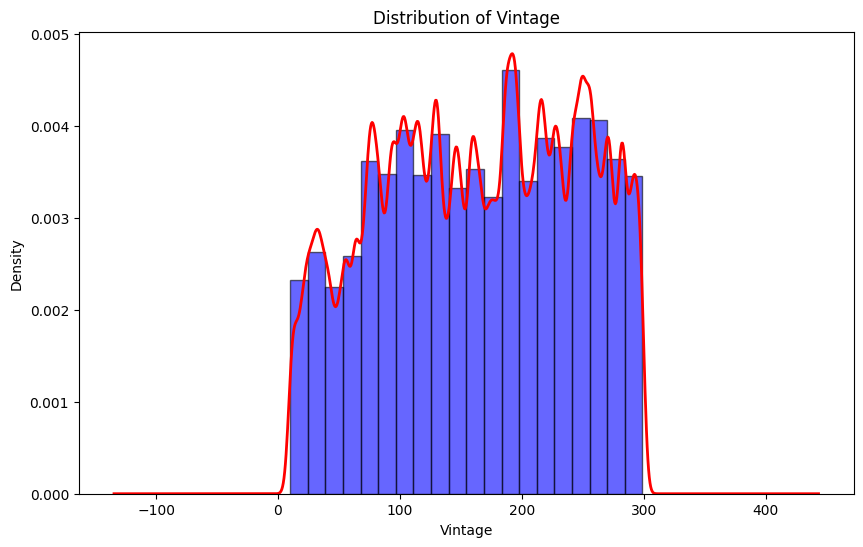

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# train = pd.read_csv("your_data.csv")  #

numerical_features = ['Age', 'Region_Code', 'Annual_Premium', 'Vintage']

# 
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    
    # 
    df_train[feature].plot(kind='hist', bins=20, alpha=0.6, color='blue', edgecolor='black', density=True)
    
    # 
    df_train[feature].plot(kind='density', color='red', lw=2)
    
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()


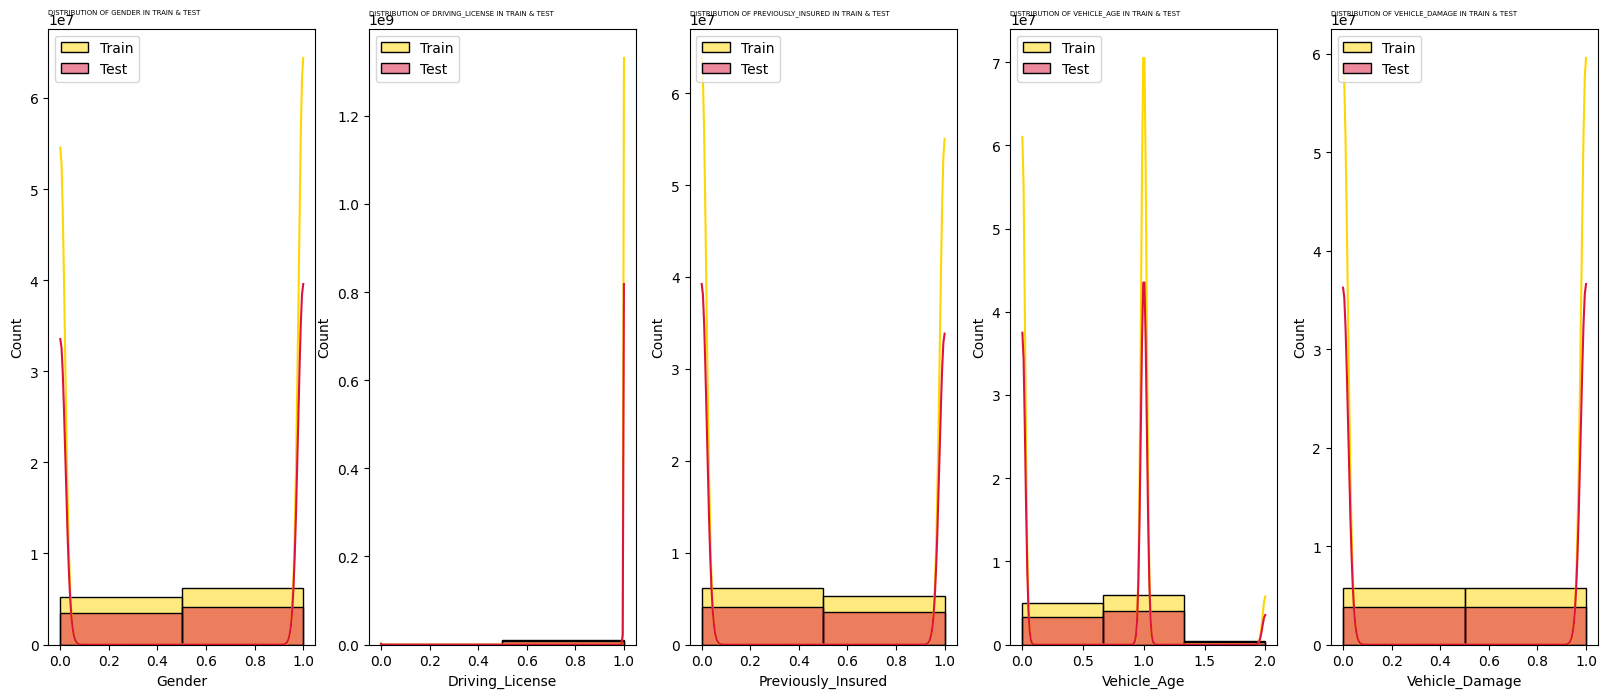

In [15]:
fig, ax = plt.subplots(ncols=5, figsize=(20,8))
for i, col in enumerate(['Gender', 'Driving_License','Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']):
    n_bins =df_train[col].unique().shape[0]
    sns.histplot(df_train[col], color="gold", kde=True, bins=n_bins,
                 label='Train', ax=ax[i], legend=True)
    sns.histplot(df_test[col], color="crimson", kde=True, bins=n_bins,
                 label='Test', ax=ax[i], legend=True)
    #ax[i].title.set_text(col+" by Survived")
    ax[i].set_title("DISTRIBUTION OF {} IN TRAIN & TEST".format(col.upper())
                    , x=0.0, y=1.01, ha='left', fontweight=100, fontfamily='Lato', size=5)
    ax[i].legend(loc='upper left')

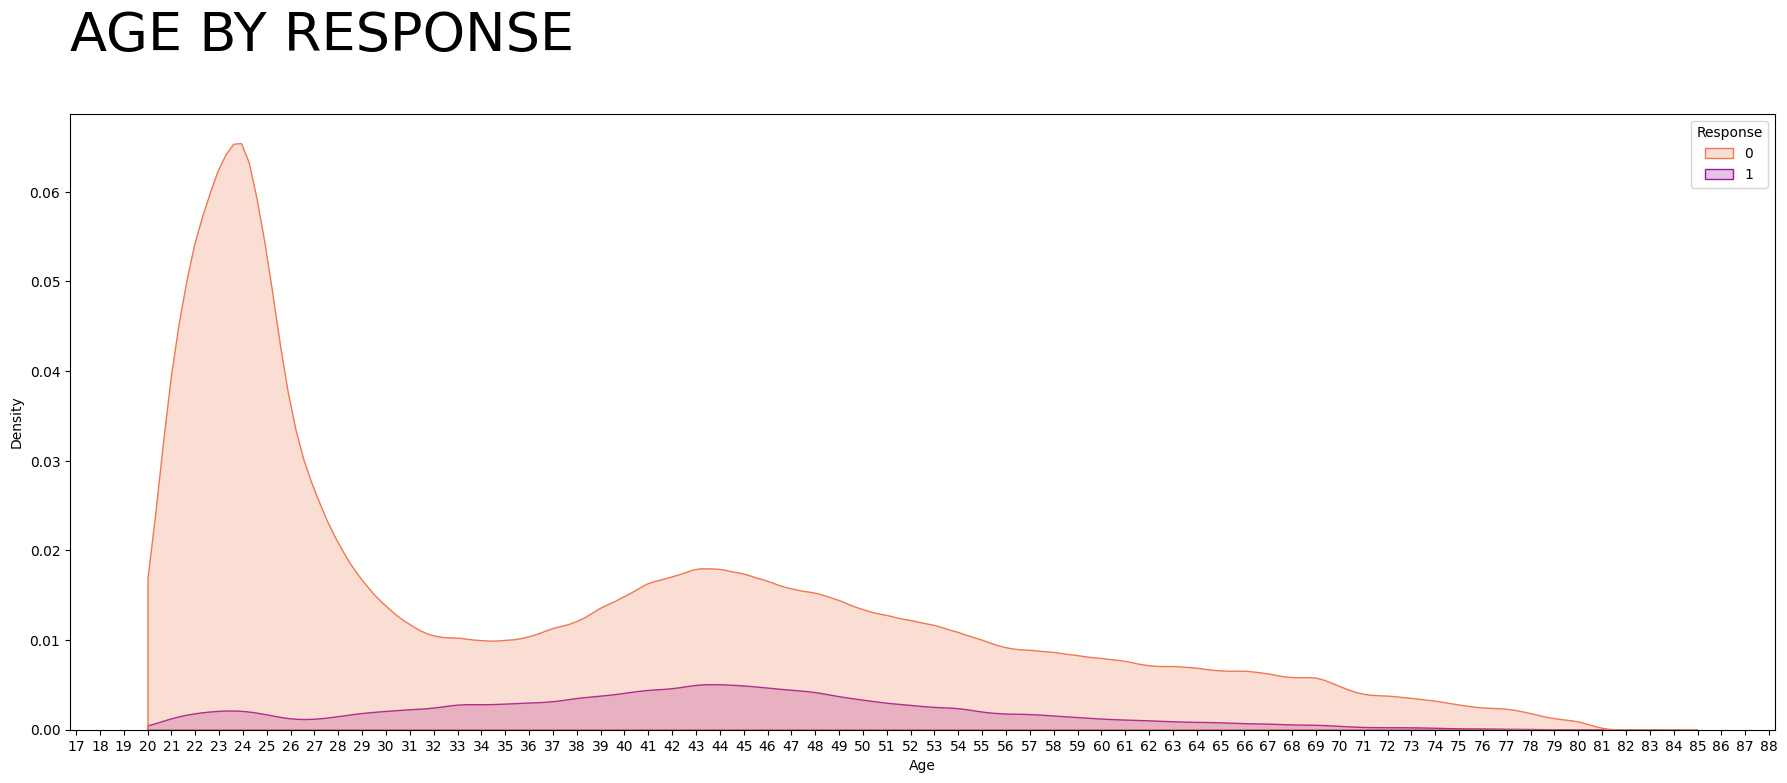

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

fig = plt.figure(figsize=(22, 8))

#
kde = sns.kdeplot(x='Age', data=df_train, cut=0, hue='Response',
                  fill=True, palette='plasma_r')

# 
kde.xaxis.set_major_locator(ticker.MultipleLocator(1))
kde.xaxis.set_major_formatter(ticker.ScalarFormatter())

# 
fig.suptitle("AGE BY RESPONSE", x=0.125, y=1.01, ha='left',
             fontweight=100, fontfamily='Lato', size=39)

plt.show()


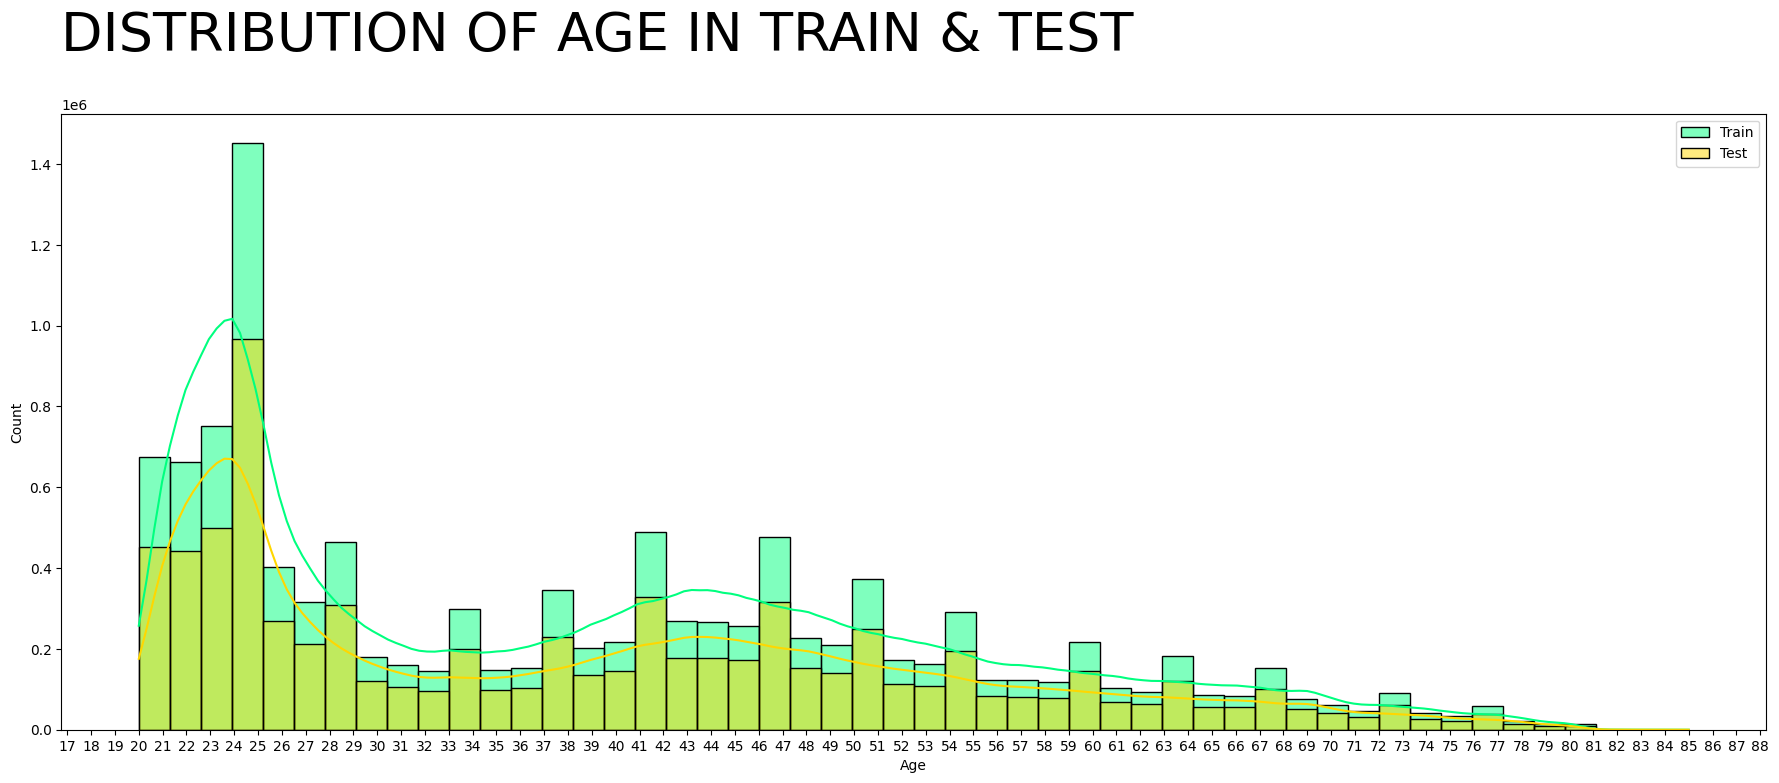

In [17]:
fig = plt.figure(figsize=(22,8))
hist = sns.histplot(df_train['Age'], color="springgreen", kde=True, bins=50, label='Train')
hist = sns.histplot(df_test['Age'], color="gold", kde=True, bins=50, label='Test')

title = fig.suptitle("DISTRIBUTION OF AGE IN TRAIN & TEST", x=0.125, y=1.01, ha='left',
             fontweight=100, fontfamily='Lato', size=39)

hist.xaxis.set_major_locator(ticker.MultipleLocator(1))
hist.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.legend()
plt.show()

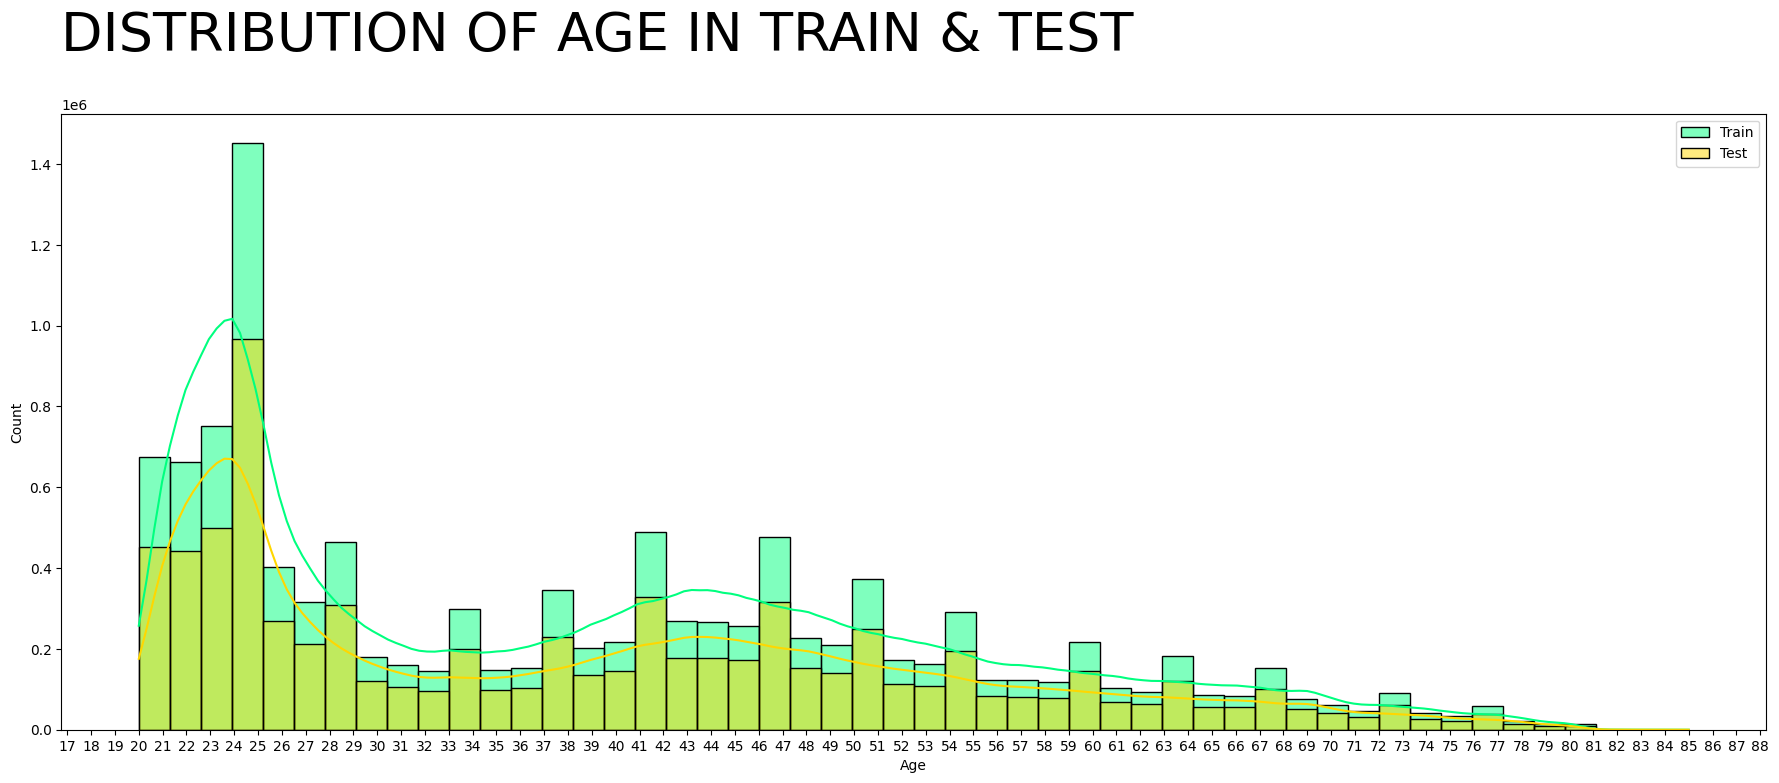

In [18]:
fig = plt.figure(figsize=(22,8))
hist = sns.histplot(df_train['Age'], color="springgreen", kde=True, bins=50, label='Train')
hist = sns.histplot(df_test['Age'], color="gold", kde=True, bins=50, label='Test')

title = fig.suptitle("DISTRIBUTION OF AGE IN TRAIN & TEST", x=0.125, y=1.01, ha='left',
             fontweight=100, fontfamily='Lato', size=39)

hist.xaxis.set_major_locator(ticker.MultipleLocator(1))
hist.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.legend()
plt.show()

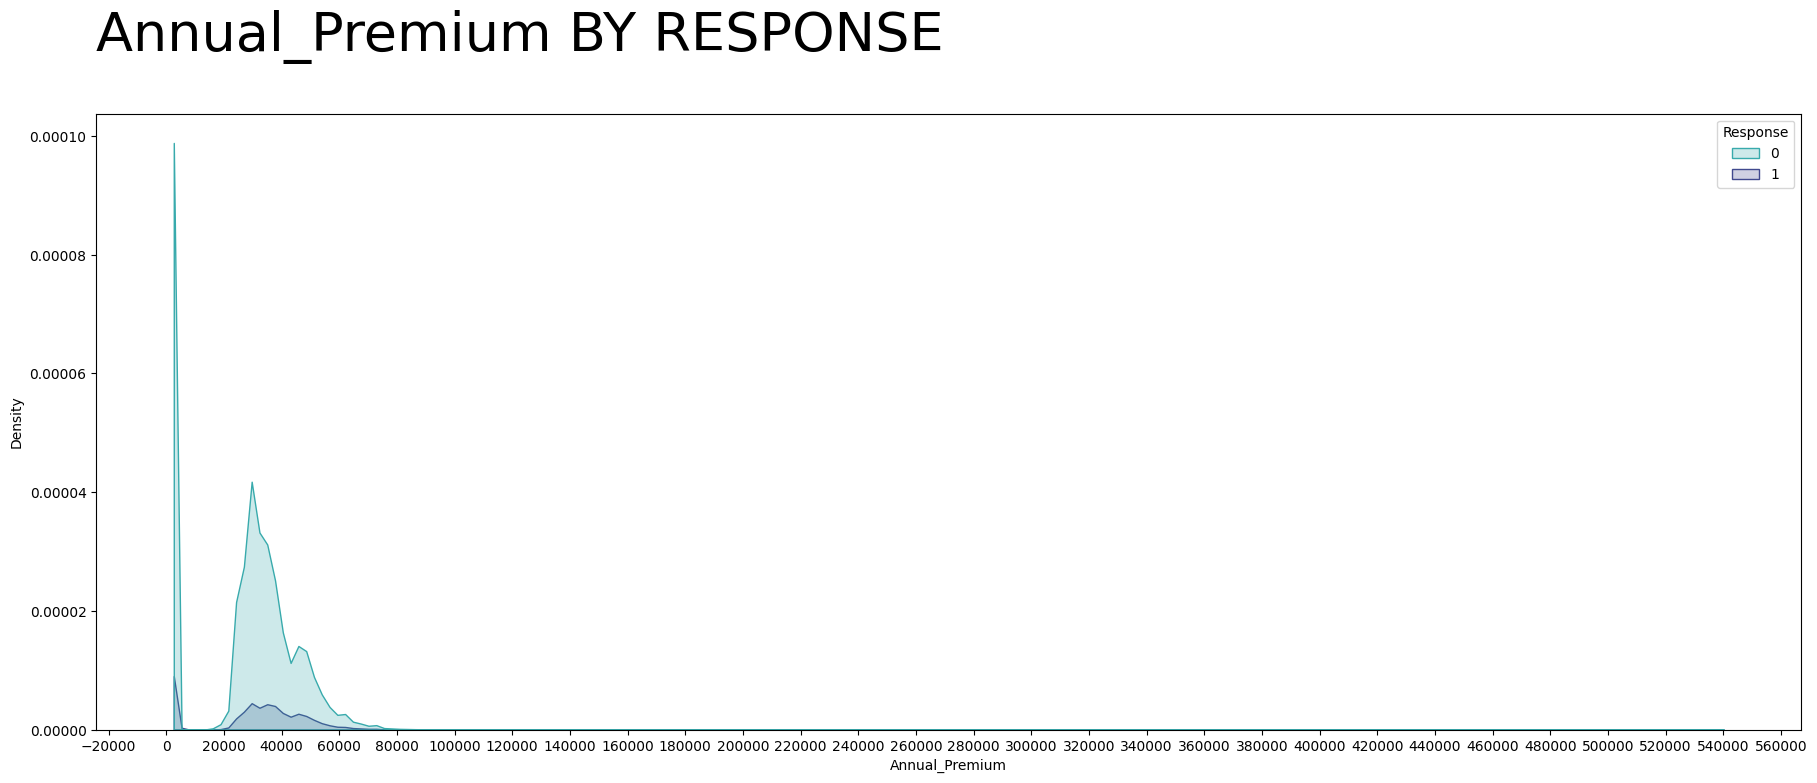

In [19]:
fig = plt.figure(figsize=(22,8))
kde = sns.kdeplot(x="Annual_Premium", data=df_train, cut=0, hue="Response", fill=True, legend=True, palette="mako_r")

kde.xaxis.set_major_locator(ticker.MultipleLocator(20000))
kde.xaxis.set_major_formatter(ticker.ScalarFormatter())

fig.suptitle("Annual_Premium BY RESPONSE", x=0.125, y=1.01
            , ha='left',fontweight=100, fontfamily='Lato', size=39);

Text(0.12, 1.01, 'Annual_Premium BY RESPOMSE - CLIPPED TO REMOVE OUTLIERS')

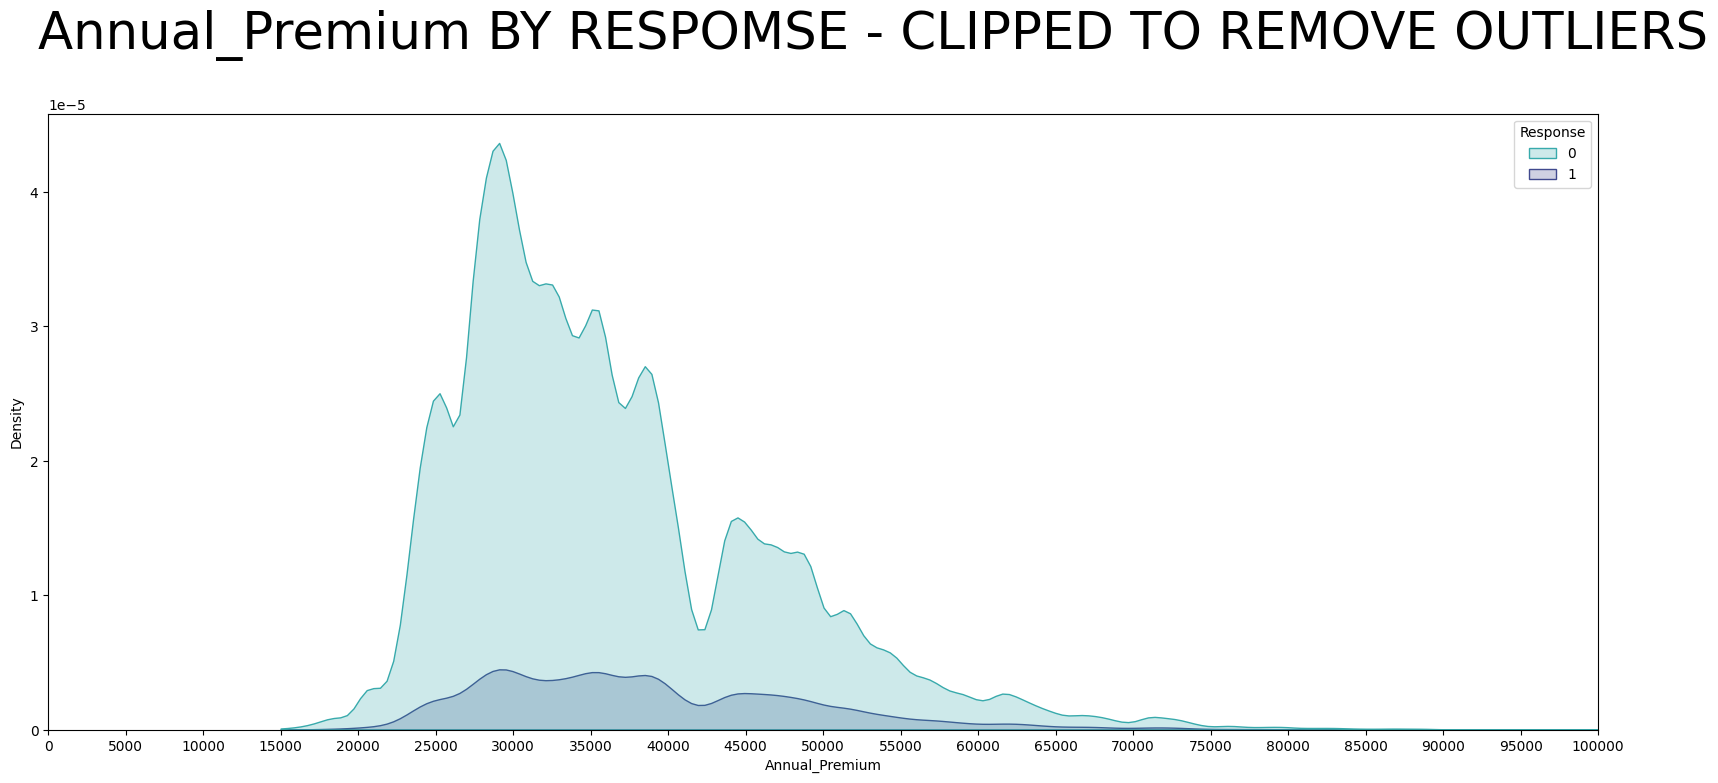

In [20]:
fig = plt.figure(figsize=(20,8))
kde = sns.kdeplot(x="Annual_Premium", data=df_train, cut=0, clip=[15000,100000], hue="Response", fill=True, legend=True, palette="mako_r")

# 设置X轴的刻度间隔和范围
kde.xaxis.set_major_locator(ticker.MultipleLocator(5000))  # 根据数据密度调整这个值
kde.set_xlim([0, 100000])  # 设置X轴的显示范围

kde.xaxis.set_major_formatter(ticker.ScalarFormatter())

fig.suptitle("Annual_Premium BY RESPOMSE - CLIPPED TO REMOVE OUTLIERS", x=0.12, y=1.01, ha='left',
             fontweight=100, fontfamily='Lato', size=37)


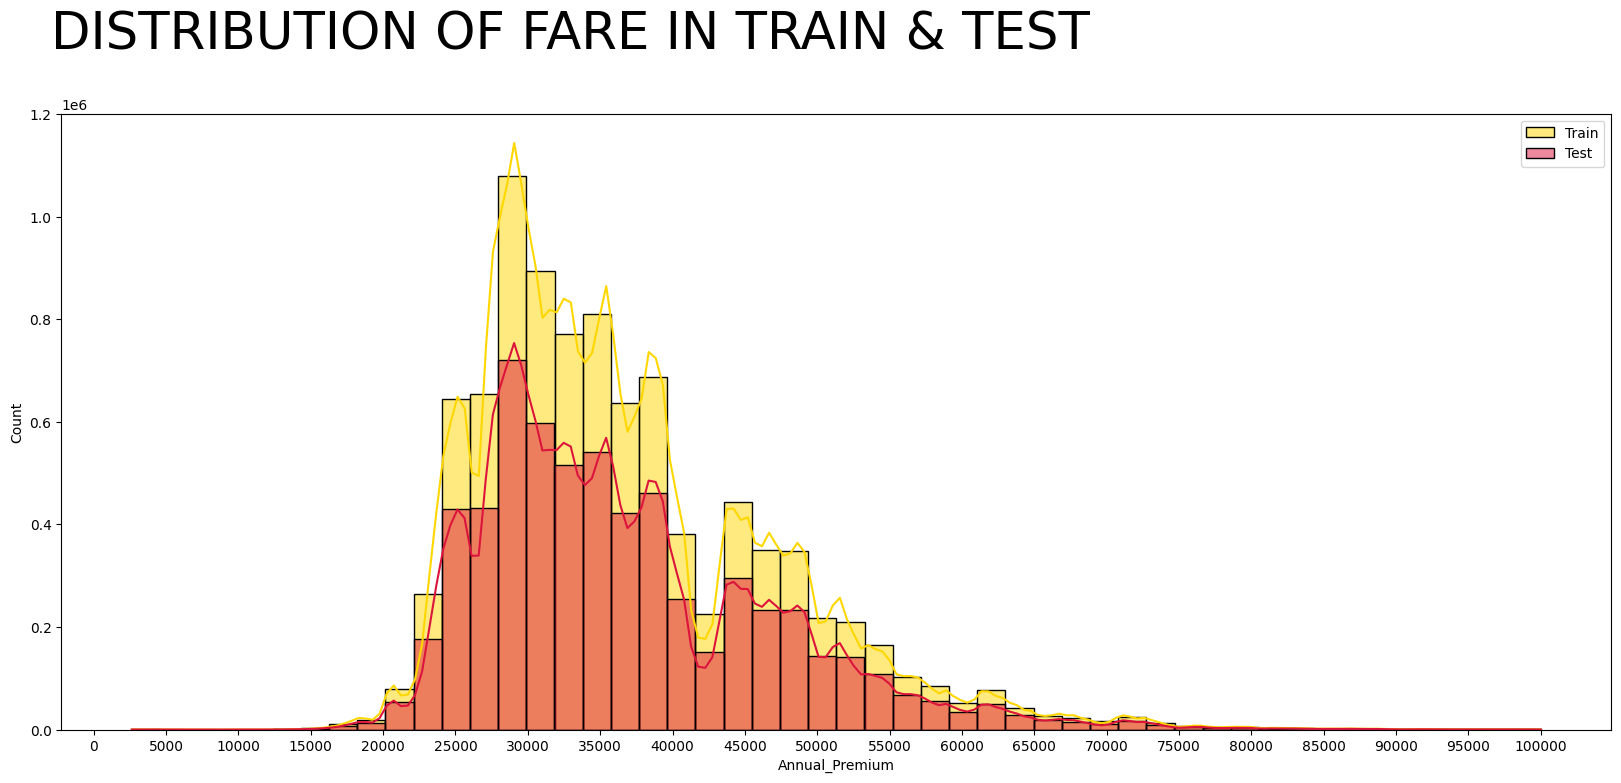

In [21]:
fig = plt.figure(figsize=(20,8))
dist = sns.histplot(df_train[(df_train.Annual_Premium > 2630.00) & (df_train.Annual_Premium <=100000)]['Annual_Premium'],
                    color="gold", kde=True, bins=50, label='Train')
dist = sns.histplot(df_test[(df_test.Annual_Premium > 2630.00) & (df_test.Annual_Premium <=100000)]['Annual_Premium'],
                    color="crimson", kde=True, bins=50, label='Test')

title = fig.suptitle("DISTRIBUTION OF FARE IN TRAIN & TEST", x=0.12, y=1.01, ha='left',
             fontweight=100, fontfamily='Lato', size=37)

dist.xaxis.set_major_locator(ticker.MultipleLocator(5000))
dist.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.legend()
plt.show()


In [3]:
X = df_train.iloc[:,:-1]
y = df_train.iloc[:,-1]

NameError: name 'df_train' is not defined

In [23]:

from xgboost import XGBClassifier
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.metrics import classification_report
from bayes_opt import BayesianOptimization


xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='auc')


kf = KFold(n_splits=5, shuffle=True, random_state=666)

y_pred_original = cross_val_predict(xgb_clf, X, y, cv=kf)
print("Original Dataset Classification Report")
print(classification_report(y, y_pred_original))


Original Dataset Classification Report
              precision    recall  f1-score   support

           0       0.89      0.99      0.94  10089739
           1       0.58      0.09      0.16   1415059

    accuracy                           0.88  11504798
   macro avg       0.73      0.54      0.55  11504798
weighted avg       0.85      0.88      0.84  11504798



In [ ]:

def xgb_eval(n_estimators, learning_rate, max_depth, colsample_bytree):
    params = {
        "n_estimators": int(round(n_estimators)),
        'learning_rate': learning_rate,
        'max_depth': int(round(max_depth)),
        'colsample_bytree': colsample_bytree,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'use_label_encoder': False
    }
    cv_result = cross_val_score(
        XGBClassifier(**params),
        X,
        y,
        cv=StratifiedKFold(n_splits=5),
        scoring='accuracy'
    ).mean()
    return cv_result

# 
xgb_bo = BayesianOptimization(
    f=xgb_eval,
    pbounds={
        'n_estimators': (50, 300),
        'learning_rate': (0.01, 0.3),
        'max_depth': (3, 10),
        'colsample_bytree': (0.5, 1.0)
    },
    random_state=42
)

# 
xgb_bo.maximize(init_points=5, n_iter=30)

# 
best_params = xgb_bo.max['params']

# 
print("Best XGBOOST Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value:.4f}")


|   iter    |  target   | colsam... | learni... | max_depth | n_esti... |
-------------------------------------------------------------------------
| 1         | 0.8798    | 0.6873    | 0.2857    | 8.124     | 199.7     |
| 2         | 0.877     | 0.578     | 0.05524   | 3.407     | 266.5     |
| 3         | 0.8791    | 0.8006    | 0.2153    | 3.144     | 292.5     |
| 4         | 0.877     | 0.9162    | 0.07158   | 4.273     | 95.85     |
| 5         | 0.8792    | 0.6521    | 0.1622    | 6.024     | 122.8     |
| 6         | 0.8791    | 0.9138    | 0.2907    | 9.229     | 200.1     |
| 7         | 0.8791    | 0.5335    | 0.09501   | 6.011     | 198.0     |
| 8         | 0.8799    | 0.6556    | 0.2364    | 6.391     | 201.3     |
| 9         | 0.8789    | 0.6326    | 0.1628    | 3.8       | 204.3     |


In [1]:
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

In [18]:
xgb_tuned = XGBClassifier(random_state =42,
                         eval_metric = 'auc',
                         max_depth = 10,
                         n_estimators = 173,
                         learning_rate = 0.1295 ,
xgb_tuned.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5811, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1295, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=173, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [7]:

probabilities = xgb_tuned.predict_proba(df_test)

submission = pd.DataFrame({'id': df_test['id'], 'Response': probabilities[:, 1]})


submission.to_csv('submission.csv', index=False)


print("Your submission was successfully saved!")


NameError: name 'xgb_tuned' is not defined

In [22]:
submission

,id,Response
0,11504798,0.008804
1,11504799,0.435878
2,11504800,0.226764
3,11504801,0.000180
4,11504802,0.058476
...,...,...
7669861,19174659,0.224086
7669862,19174660,0.000180
7669863,19174661,0.000357
7669864,19174662,0.513865


In [2]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


conf_mat = confusion_matrix(y, y_pred_original)


disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()


NameError: name 'y' is not defined

In [ ]:
import shap

explainer = shap.TreeExplainer(xgb_tuned)


shap_values = explainer(df_test)  
shap_values2 = explainer.shap_values(df_test) 
shap_interaction_values = explainer.shap_intercation_values(df_test)
'''


In [ ]:
shap.summary_plot(shap_values, df_test, plot_type='bar')


In [ ]:

'''
#不设置图片的的类型的话默认是群峰图
shap.summary_plot(shap_values, df_test)
'''

In [ ]:
'''
#特征交互图
shap.summary_plot(shap_interaction_values, df_test)
'''

In [ ]:

'''
#计算力图,力图是针对每一个样本的，不过可以力图叠加
shap.plots.force(shap_values[14)
shap.plot.force(shap_values[:20])
'''

In [ ]:
'''
#瀑布图其实和力图是有点同质化的
shap.plots.waterfall(shap_values[14])
'''

In [ ]:
'''
#特征交互影像图
shap.dependence_plot('I', shap_values2, df_test, interaction_index='H')
'''

In [ ]:
'''
# 创建 shap.Explanation 对象
shap_expanation = shap.Explanation(values=shap_values[10:30],
                                  base_values=explainer.expected_value,
                                  data=df_test, feature_names=df_test.colums)
# 绘制热图
shap.plots.heatmap(shap_explantion)
'''
